In [3]:
import pandas as pd
df = pd.read_csv('../datasets/lentil-samaranayaka/data.csv', delimiter='\t', index_col=0)
df

,Lentil,Pea,Chickpea,Soybean,Egg,Whole Wheat,Brown Rice
Amino Acid,,,,,,,
Alanine,4.2,4.4,4.3,5.2,0.0,3.7,5.8
Arginine,7.7,8.9,9.4,8.6,6.2,4.9,7.6
Aspartic acid,11.1,11.8,11.8,14.0,11.0,5.5,9.4
Cystine,1.3,1.5,1.3,1.8,2.3,2.1,1.2
Glutamic acid,15.5,17.1,17.5,21.6,12.6,32.8,20.4
Glycine,4.1,4.4,4.2,5.2,4.2,4.3,4.9
Histidine,2.8,2.4,2.8,3.0,2.4,2.7,2.5
Isoleucine,4.3,4.1,4.3,5.4,6.6,3.4,4.2
Leucine,7.3,7.2,7.1,9.1,8.8,6.8,8.3


<Axes: xlabel='Amino Acid'>

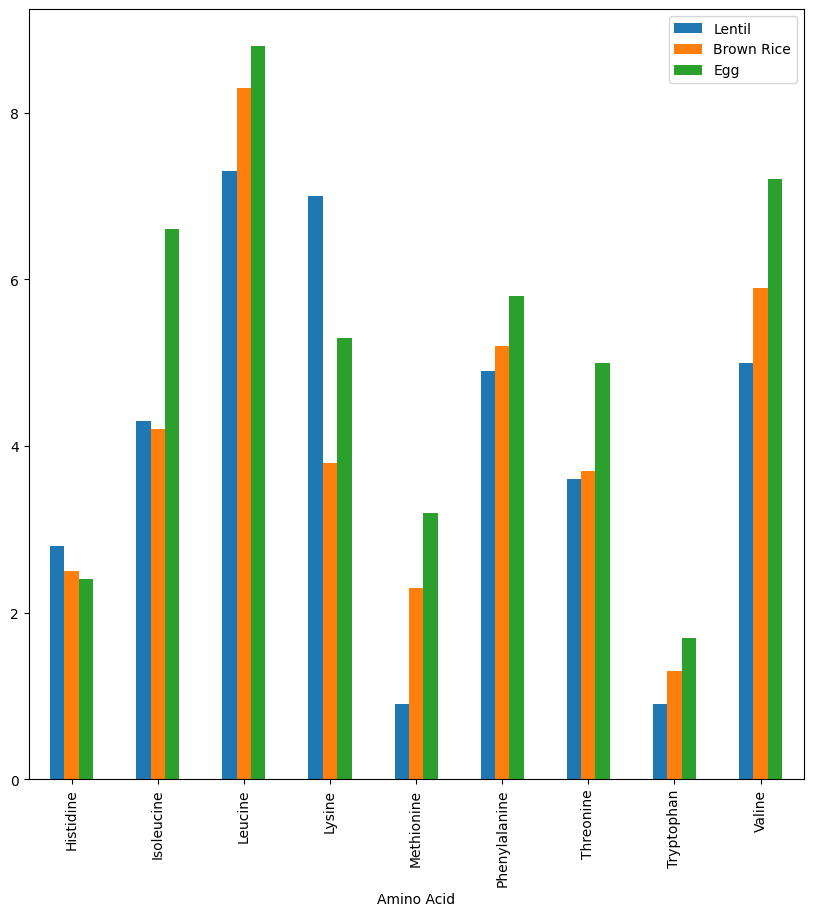

In [6]:
df[['Lentil', 'Brown Rice', 'Egg']].loc[['Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanine', 'Threonine', 'Tryptophan', 'Valine']].plot(kind='bar', figsize=(10,10))

In [7]:
df['Soybean'].sum()

117.8